# Данилов Д. С. ИУ5-61Б РК1 Вариант 4

## Задача

#### Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

## Дополнительное требование

#### Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

### Задание

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0.0,1,168.0,0.0,1.0,2,2,3.0,0.0
1,53.0,1,0,NaN,203.0,1.0,0,155.0,1.0,3.1,0,0,3.0,0.0
2,70.0,1,0,145.0,NaN,0.0,1,125.0,1.0,2.6,0,0,3.0,0.0
3,61.0,1,0,148.0,203.0,0.0,1,161.0,0.0,0.0,2,1,3.0,0.0
4,62.0,0,0,138.0,294.0,1.0,1,NaN,0.0,1.9,1,3,2.0,0.0


Количество строк с пустыми значениями

In [4]:
data.isna().sum()

age          3
sex          0
cp           0
trestbps    17
chol        18
fbs          4
restecg      0
thalach     10
exang        2
oldpeak      0
slope        0
ca           0
thal         1
target       1
dtype: int64

Удаление строк с пустыми значениями

In [5]:
data.dropna(inplace=True, axis=0, subset=['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'thal', 'target'])
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Корреляция

<AxesSubplot:>

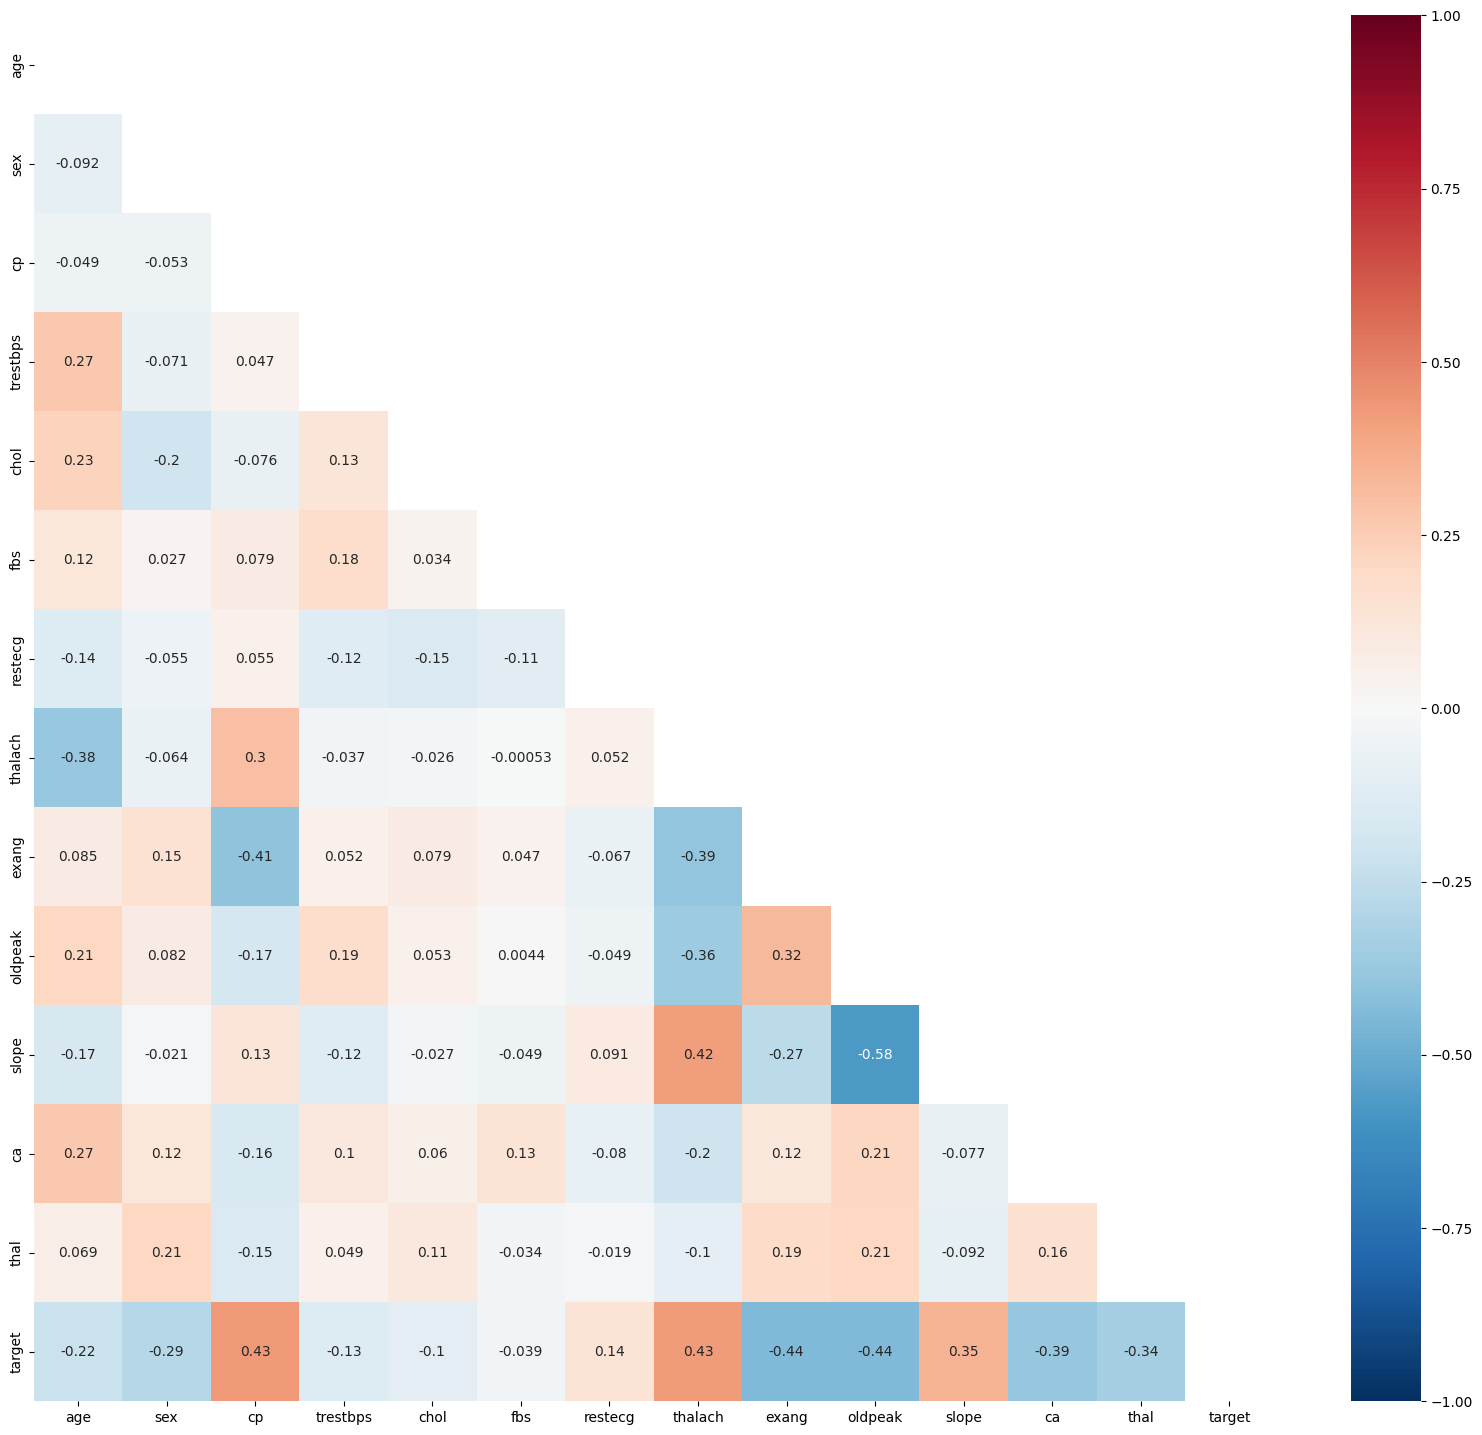

In [6]:
plt.figure(figsize=(20, 18))
mask=np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, vmin=-1.0, vmax=1, center=0, cmap='RdBu_r')

Вывод

### Дополнительное задание

#### Диаграмма рассеяния по возрасту и холестерину

Text(0, 0.5, 'Холестерин')

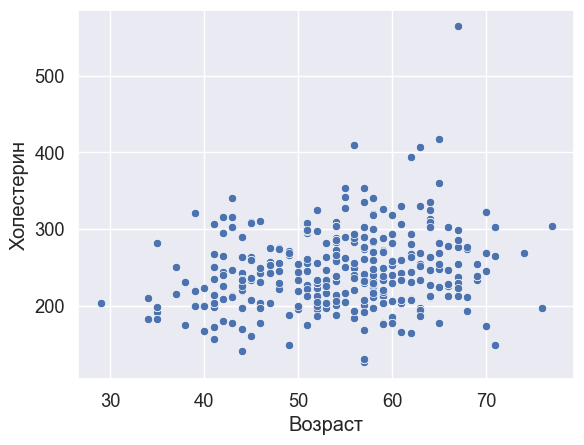

In [7]:
sns.set(font_scale=1.2)
sns.scatterplot(x='age', y='chol', data=data)
plt.xlabel('Возраст')
plt.ylabel('Холестерин')

#### Диаграмма рассеяния по возрасту и максимально зафиксированному пульсу

Text(0, 0.5, 'Пульс')

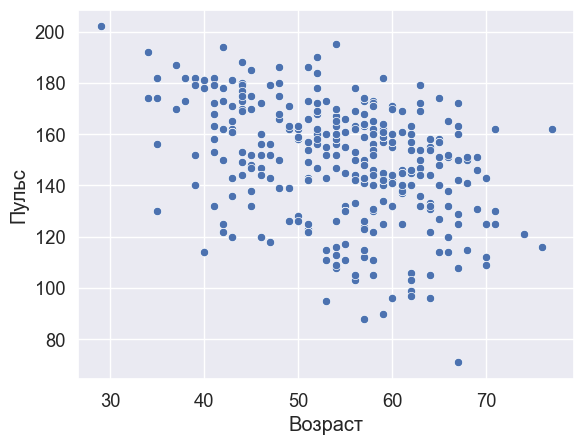

In [8]:
sns.set(font_scale=1.2)
sns.scatterplot(x='age', y='thalach', data=data)
plt.xlabel('Возраст')
plt.ylabel('Пульс')

#### Диаграмма рассеяния по возрасту и по артериальному давлению в покое

Text(0, 0.5, 'Артериальное давление')

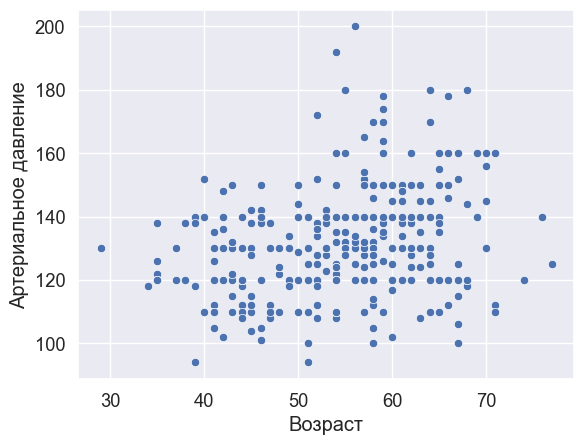

In [9]:
sns.set(font_scale=1.2)
sns.scatterplot(x='age', y='trestbps', data=data)
plt.xlabel('Возраст')
plt.ylabel('Артериальное давление')